# **Pre-Processing**

In [3]:
#cd /content/drive/MyDrive/Term Deposit Marketing

/content/drive/MyDrive/Term Deposit Marketing


In [8]:
#!gdown https://drive.google.com/uc?id=1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7  #downloading the data

Downloading...
From: https://drive.google.com/uc?id=1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7
To: /content/drive/MyDrive/Term Deposit Marketing/term-deposit-marketing-2020.csv
2.79MB [00:00, 43.3MB/s]


In [137]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier, cv, Pool

In [138]:
data = pd.read_csv("/content/drive/MyDrive/Term Deposit Marketing/term-deposit-marketing-2020.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [139]:
data.info() 
#no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [140]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [141]:
data_age=data[["age","y"]]
data_age.describe()

,age
count,40000.000000
mean,40.544600
std,9.641776
min,19.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


# **Plotting**

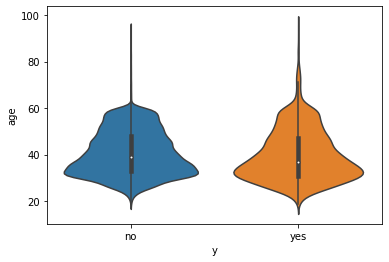

In [142]:
sns.violinplot(x="y",y="age",data=data_age)
plt.show()

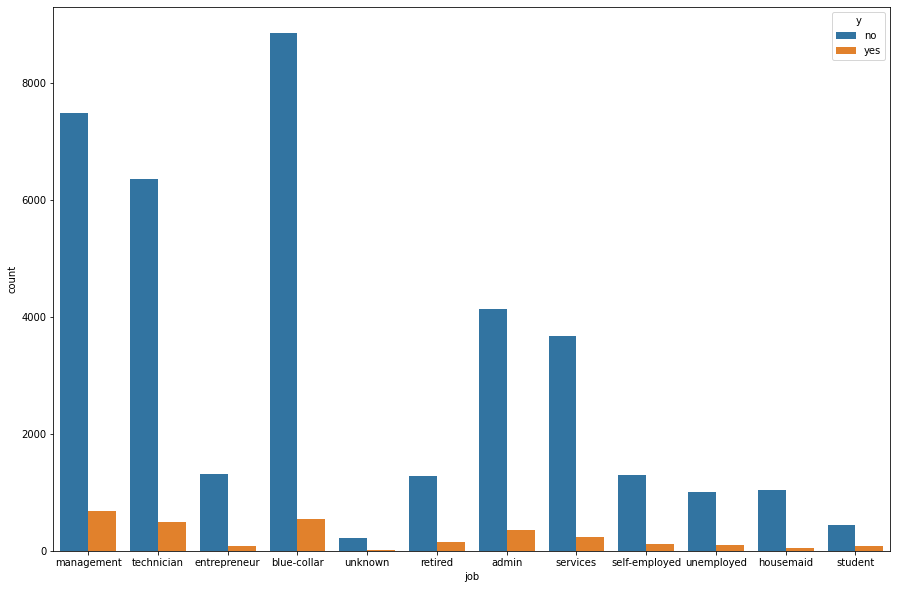

In [144]:
plt.figure(figsize=(15,10))
sns.countplot(x="job",hue="y",data=data)
plt.show()

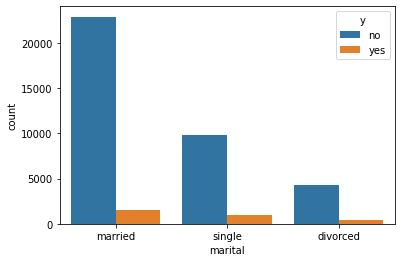

In [145]:
sns.countplot(x="marital",hue="y",data=data)
plt.show()

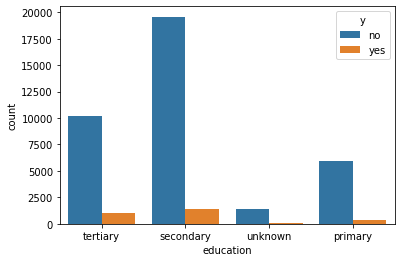

In [146]:
sns.countplot(x="education",hue="y",data=data)
plt.show()

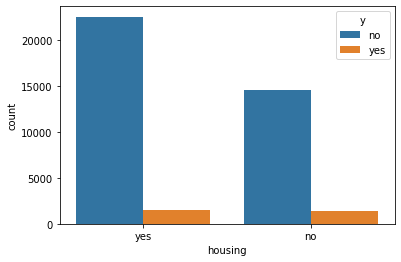

In [147]:
sns.countplot(x="housing",hue="y",data=data)
plt.show()

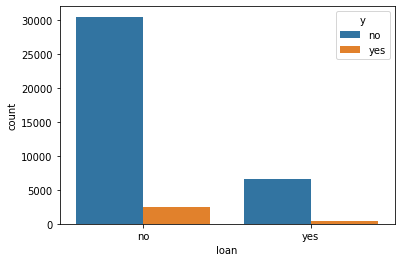

In [148]:
sns.countplot(x="loan",hue="y",data=data)
plt.show()

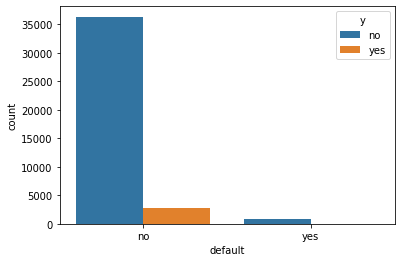

In [149]:
sns.countplot(x="default",hue="y",data=data)
plt.show()

# **Data Preparing**

**Mapping**

In [150]:
df = data

In [151]:
df['job']=df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin':3,'services':4,'retired':5,'self-employed':6
                         ,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10,'unknown':11})
df['month']=df['month'].map({'may':0,'jul':1,'aug':2,'jun':3,'nov':4,'apr':5,'feb':6
                         ,'jan':7,'mar':8,'oct':9,'dec':10})
df['marital']=df['marital'].map({'married':0,'single':1,'divorced':2})
df['education']=df['education'].map({'unknown':0,'primary':1,'tertiary':2,'secondary':3})
df['contact']=df['contact'].map({'cellular':0,'unknown':1,'telephone':2})
df['default']=df['default'].map({'no':0,'yes':1})
df['housing']=df['housing'].map({'no':0,'yes':1})
df['loan']=df['loan'].map({'no':0,'yes':1})
df['y']=df['y'].map({'no':0,'yes':1})

In [152]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,1,0,2,0,2143,1,0,1,5,0,261,1,0
1,44,2,1,3,0,29,1,0,1,5,0,151,1,0
2,33,7,0,3,0,2,1,1,1,5,0,76,1,0
3,47,0,0,0,0,1506,1,0,1,5,0,92,1,0
4,33,11,1,0,0,1,0,0,1,5,0,198,1,0


# **Building Model**

**Splitting into test and train datas**

In [153]:
x_train=df.drop(labels=['y'],axis=1)
y_train=df['y'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.25, random_state=2)

kfold = StratifiedKFold(n_splits=5) #5-fold cross validation as you wish

**Building model and training**

In [154]:
model = CatBoostClassifier()
model.fit(X_test,Y_test)

y_pred=model.predict(X_test)
y_true=pd.DataFrame(Y_test)
from sklearn.metrics import classification_report
model_report=classification_report(y_true,y_pred,output_dict=True)
pd.DataFrame(model_report)

Learning rate set to 0.027538
0:	learn: 0.6498045	total: 8.46ms	remaining: 8.46s
1:	learn: 0.6107288	total: 16.9ms	remaining: 8.45s
2:	learn: 0.5774292	total: 24.1ms	remaining: 8.03s
3:	learn: 0.5489561	total: 32.1ms	remaining: 7.98s
4:	learn: 0.5204461	total: 39.6ms	remaining: 7.88s
5:	learn: 0.4880965	total: 47.6ms	remaining: 7.88s
6:	learn: 0.4611077	total: 55.7ms	remaining: 7.9s
7:	learn: 0.4349573	total: 63.6ms	remaining: 7.89s
8:	learn: 0.4152491	total: 71.3ms	remaining: 7.86s
9:	learn: 0.3943028	total: 79.3ms	remaining: 7.85s
10:	learn: 0.3789728	total: 87.1ms	remaining: 7.83s
11:	learn: 0.3601124	total: 94.9ms	remaining: 7.82s
12:	learn: 0.3434354	total: 103ms	remaining: 7.8s
13:	learn: 0.3283152	total: 111ms	remaining: 7.78s
14:	learn: 0.3151675	total: 118ms	remaining: 7.77s
15:	learn: 0.3047621	total: 126ms	remaining: 7.75s
16:	learn: 0.2942338	total: 134ms	remaining: 7.75s
17:	learn: 0.2865962	total: 142ms	remaining: 7.76s
18:	learn: 0.2798280	total: 150ms	remaining: 7.75s
1

,0,1,accuracy,macro avg,weighted avg
precision,0.976026,0.982143,0.9763,0.979084,0.976435
recall,0.999143,0.657698,0.9763,0.828420,0.976300
f1-score,0.987449,0.787825,0.9763,0.887637,0.974094
support,9331.000000,669.000000,0.9763,10000.000000,10000.000000


# **Plotting the result**
# **0.976 ACCURACY!**

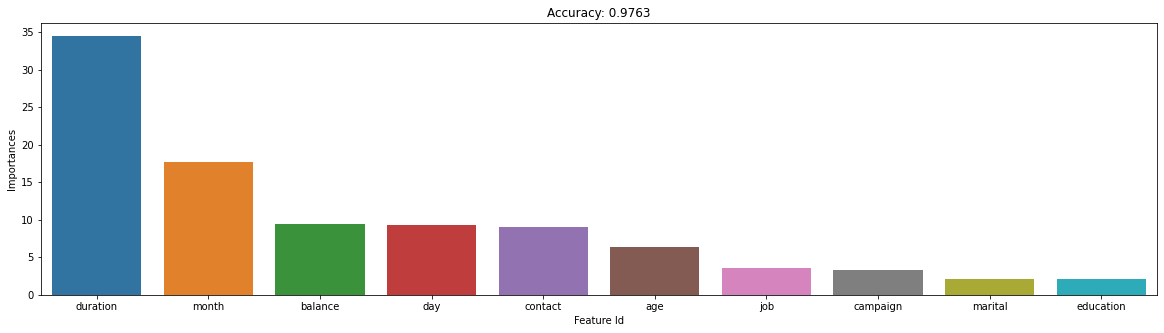

In [155]:
plt.figure(figsize=(20,5))
important=cb.get_feature_importance(prettified=True).head(10)
sns.barplot(x="Feature Id",y="Importances",data=important)
score=model.score(X_test,Y_test)
plt.title('Accuracy: '+str(score))
plt.show()

**Saving model**

In [157]:
model.save_model("model", format="cbm")